# Proyecto de Ciencia de Datos con Python de nivel básico

## Introducción

El objetivo de este proyecto es realizar un análisis exploratorio de la producción de Nuez dentro del estado de Chihuahua, graficar sus tendencias para una mejor observación y poder realizar un pronóstico del volumen de producción del año 2020 con base a los registros históricos de años anteriores y medir la fiabilidad de nuestro modelo planteado en este cuaderno.

## Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Creamos los DataFrames necesarios
Para esta investigación se realizó una exploración del cierre agrícola del 2019 para poder observar los datos con los que contamos y cómo estos son manejados en su tabulación.

In [2]:
cierreAgricola2019 = pd.read_csv("src/Cierre_agricola_mun_2019.csv", encoding='ISO-8859-1')

cierreAgricola2019.head()

,Anio,Idestado,Nomestado,Idddr,Nomddr,Idcader,Nomcader,Idmunicipio,Nommunicipio,Idciclo,...,Nomunidad,Idcultivo,Nomcultivo Sin Um,Sembrada,Cosechada,Siniestrada,Volumenproduccion,Rendimiento,Precio,Valorproduccion
0,2019,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5490000,Avena forrajera en verde,1525.0,1525.0,0.0,41182.48,27.00,567.67,23378058.42
1,2019,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,5900000,Cebada forrajera en verde,35.0,35.0,0.0,945.00,27.00,575.71,544045.95
2,2019,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,9090000,Triticale forrajero en verde,364.0,364.0,0.0,12037.00,33.07,569.82,6858923.34
3,2019,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,...,Tonelada,15050000,Pastos y praderas,460.0,460.0,0.0,22808.00,49.58,552.79,12608034.32
4,2019,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,2,...,Tonelada,5490000,Avena forrajera en verde,146.0,146.0,0.0,4013.60,27.49,601.36,2413618.50


In [3]:
cierreAgricola2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36695 entries, 0 to 36694
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Anio                36695 non-null  int64  
 1   Idestado            36695 non-null  int64  
 2   Nomestado           36695 non-null  object 
 3   Idddr               36695 non-null  int64  
 4   Nomddr              36695 non-null  object 
 5   Idcader             36695 non-null  int64  
 6   Nomcader            36695 non-null  object 
 7   Idmunicipio         36695 non-null  int64  
 8   Nommunicipio        36695 non-null  object 
 9   Idciclo             36695 non-null  int64  
 10  Nomcicloproductivo  36695 non-null  object 
 11  Idmodalidad         36695 non-null  int64  
 12  Nommodalidad        36695 non-null  object 
 13  Idunidadmedida      36695 non-null  int64  
 14  Nomunidad           36695 non-null  object 
 15  Idcultivo           36695 non-null  int64  
 16  Nomc

## Filtramos con la información que necesitemos

La información seleccionada fue la producción de Nuez dentro del estado de Chihuahua  
**Nota:** En este caso usamos el Id del estado que es "8" y el Id del cultivo que es "7960000" para evitar complicaciones con los nombres y las referencias de las columnas al momento de filtrar los datos.

In [4]:
in_nuezCh = cierreAgricola2019[ (cierreAgricola2019['Idestado'] == 8) & (cierreAgricola2019['Idcultivo'] == 7960000) ]

# Realizamos un GroupBy para cada municipio
nuezCh = in_nuezCh.groupby(['Anio', 'Idddr', 'Nomddr'])[['Volumenproduccion']].sum()

# Reagrupados los terminos para que NO sean Multi-Index
nuezCh = nuezCh.reset_index()
nuezCh.head()

,Anio,Idddr,Nomddr,Volumenproduccion
0,2019,28,Casas Grandes,5598.24
1,2019,29,Buenaventura,8600.00
2,2019,30,El Carmen,8517.00
3,2019,31,Valle de Juárez,1754.43
4,2019,35,Chihuahua,15539.60


## Verificamos nuestros datos

Una vez filtrada y limpia toda la información para que obtener los valores que necesitemos, se mostró en gráfica de barras para tener una mejor visualización de la misma.

<AxesSubplot: xlabel='Nomddr'>

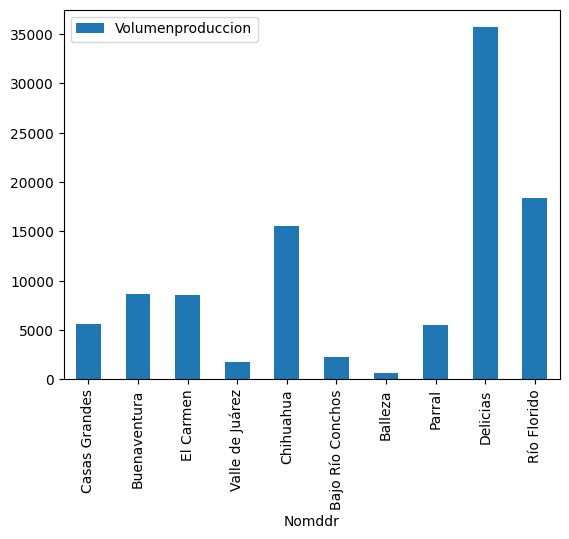

In [5]:
nuezCh.plot.bar( x='Nomddr', y='Volumenproduccion')

## Unión de más DataFrames

Con todos los pasos anteriores se obtuvo toda la información del valor de la nuez durante el año 2019, el siguiente paso fue la recopilación de la misma información pero de años anteriores.

In [6]:
import os 

# Creamos la lista de CSVs que vamos a utilizar para el histórico
csv_names = [f for f in os.listdir("src") if f.endswith('.csv')]

# Los guardamos en una lista
cierresAgricolas = [ pd.read_csv(os.path.join("src", csv_name), encoding='ISO-8859-1') for csv_name in csv_names ]

# Concatenamos todos los CSV
cierresTotales = pd.DataFrame()

cierresTotales = pd.concat([csv for csv in cierresAgricolas])

cierresTotales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330384 entries, 0 to 36694
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Anio                330384 non-null  int64  
 1   Idestado            330384 non-null  int64  
 2   Nomestado           330384 non-null  object 
 3   Idddr               330384 non-null  int64  
 4   Nomddr              330384 non-null  object 
 5   Idcader             330384 non-null  int64  
 6   Nomcader            330384 non-null  object 
 7   Idmunicipio         330384 non-null  int64  
 8   Nommunicipio        330384 non-null  object 
 9   Idciclo             330384 non-null  int64  
 10  Nomcicloproductivo  330384 non-null  object 
 11  Idmodalidad         330384 non-null  int64  
 12  Nommodalidad        330384 non-null  object 
 13  Idunidadmedida      330384 non-null  int64  
 14  Nomunidad           330384 non-null  object 
 15  Idcultivo           330384 non-null

## Filtramos los datos

Teniendo el DataFrame el siguiente paso fue filtrar los datos según el tema, en nuestro caso separamos por la región de Chihuahua y tipo de cultivo: Nuez.


In [7]:
# Tomamos el estado de Chihuahua y el cultivo de Nuez
in_nuezTotal = cierresTotales[ (cierresTotales['Idestado'] == 8) & (cierresTotales['Idcultivo'] == 7960000) ]

# Realizamos un GroupBy para cada municipio
nuezTotal = in_nuezTotal.groupby(['Anio'])[['Volumenproduccion', 'Valorproduccion']].sum()

# Reagrupados los terminos para que NO sean Multi-Index
nuezTotal = nuezTotal.reset_index()
nuezTotal.head()

,Anio,Volumenproduccion,Valorproduccion
0,2011,56539.59,4.053272e+09
1,2012,60031.31,2.610019e+09
2,2013,64207.04,2.814853e+09
3,2014,80124.26,4.154456e+09
4,2015,79934.37,6.076036e+09


## Mostramos los datos


In [8]:
anio = 2020
coef = np.polyfit( nuezTotal['Anio'], nuezTotal['Volumenproduccion'], 2 )
predict = np.polyval(coef, anio)
print(f"Para el año {anio} la prediccion es de: {predict}")

def fx(x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n-1
    return fx
    

Para el año 2020 la prediccion es de: 108662.77381014824


para grado 0 la predicción es: 81089.63333333338


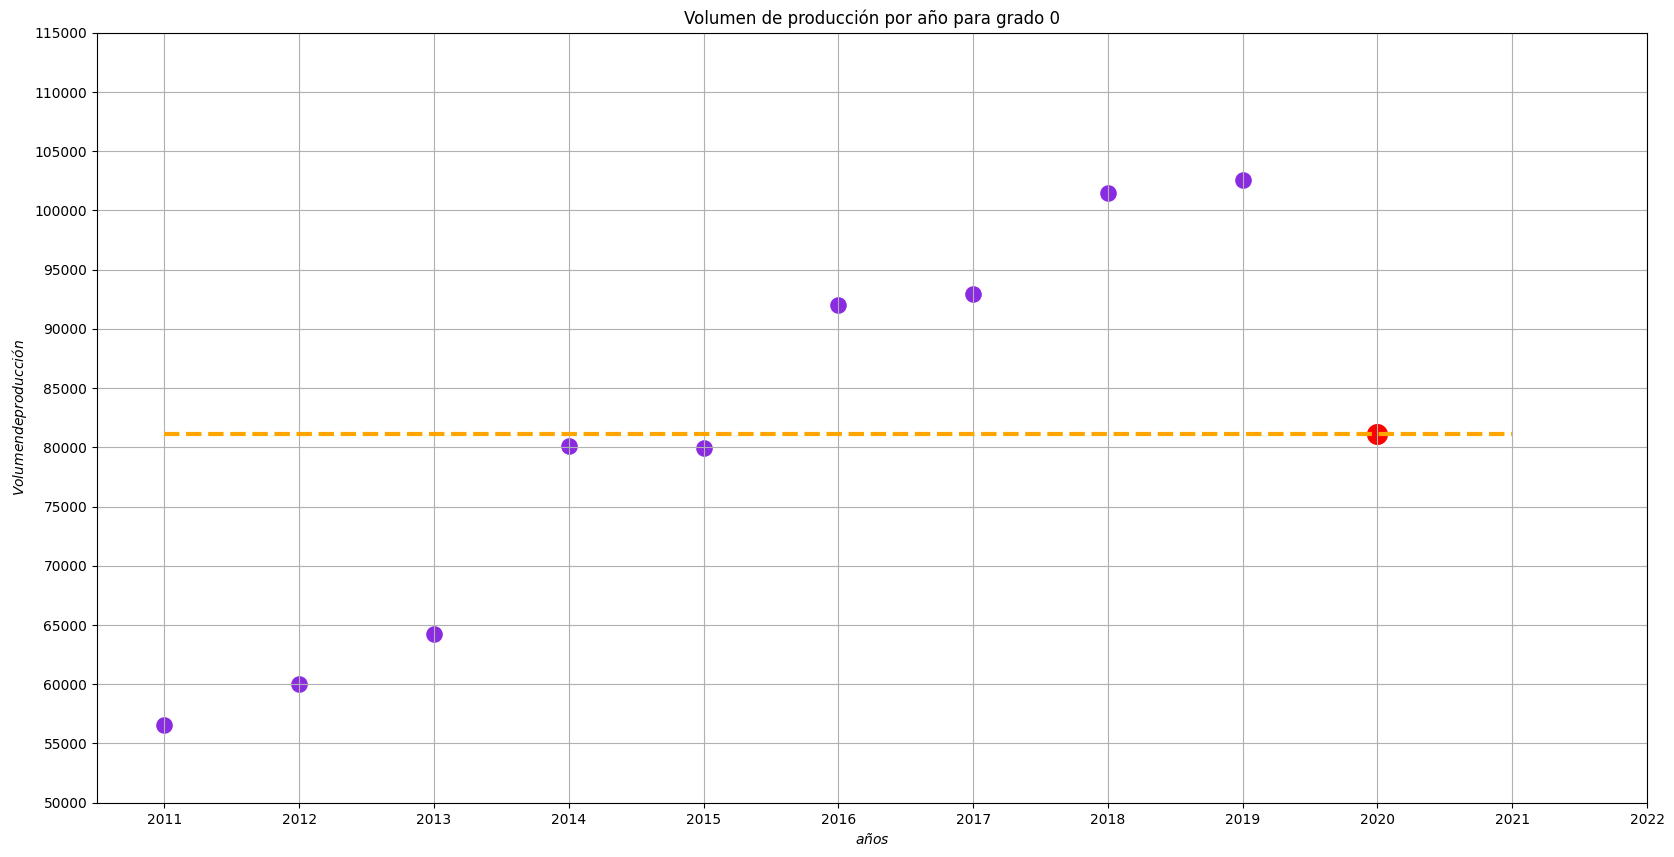

para grado 1 la predicción es: 112568.22916666791


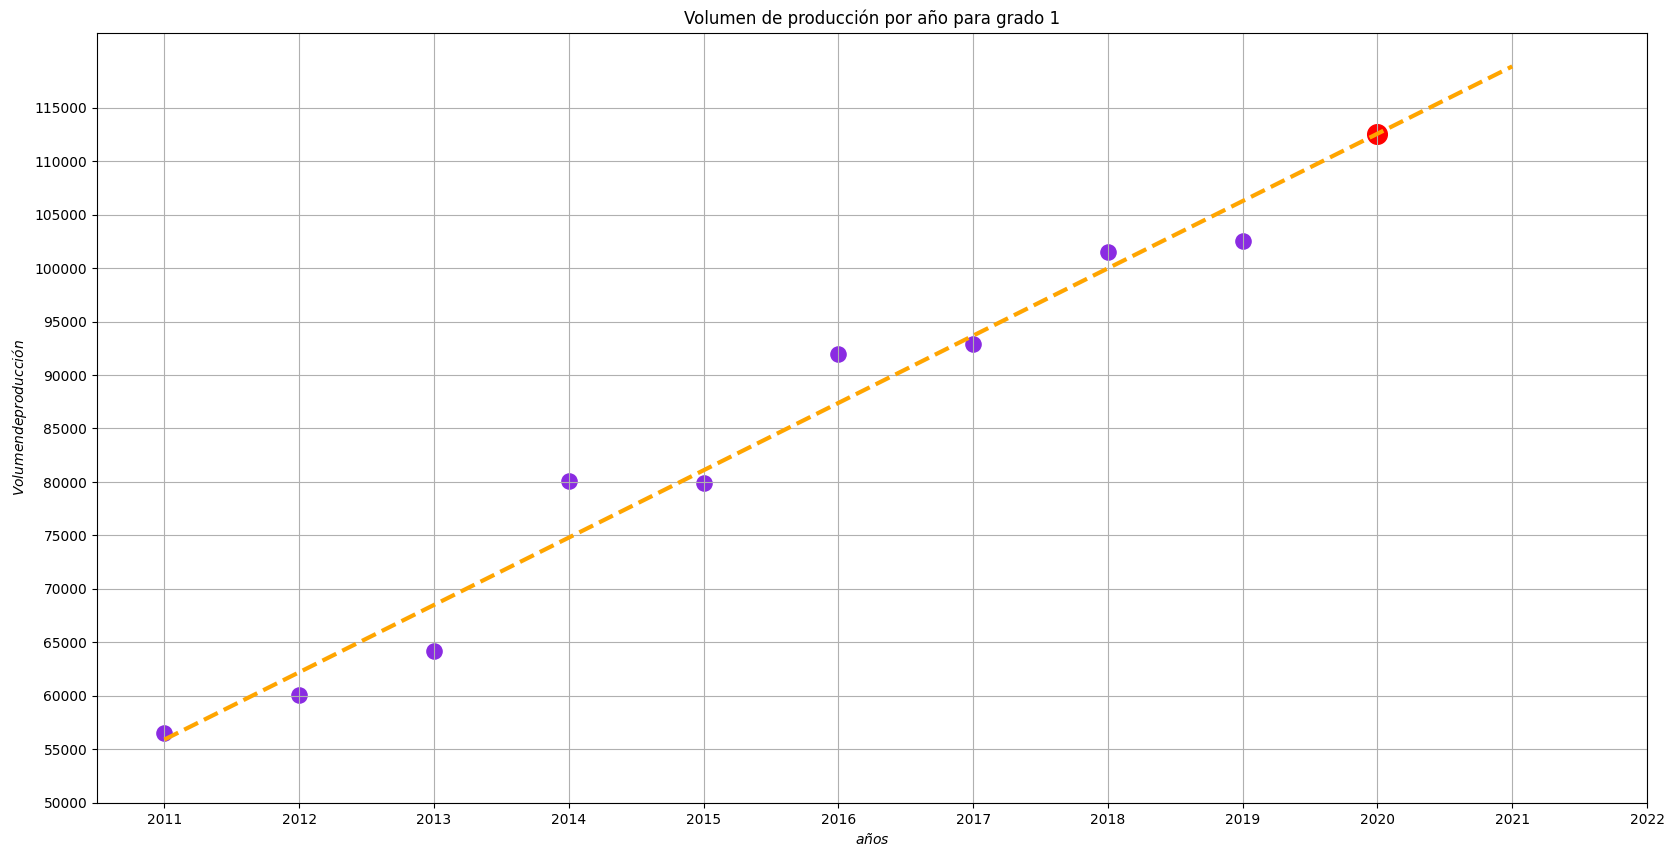

para grado 2 la predicción es: 108662.77381014824


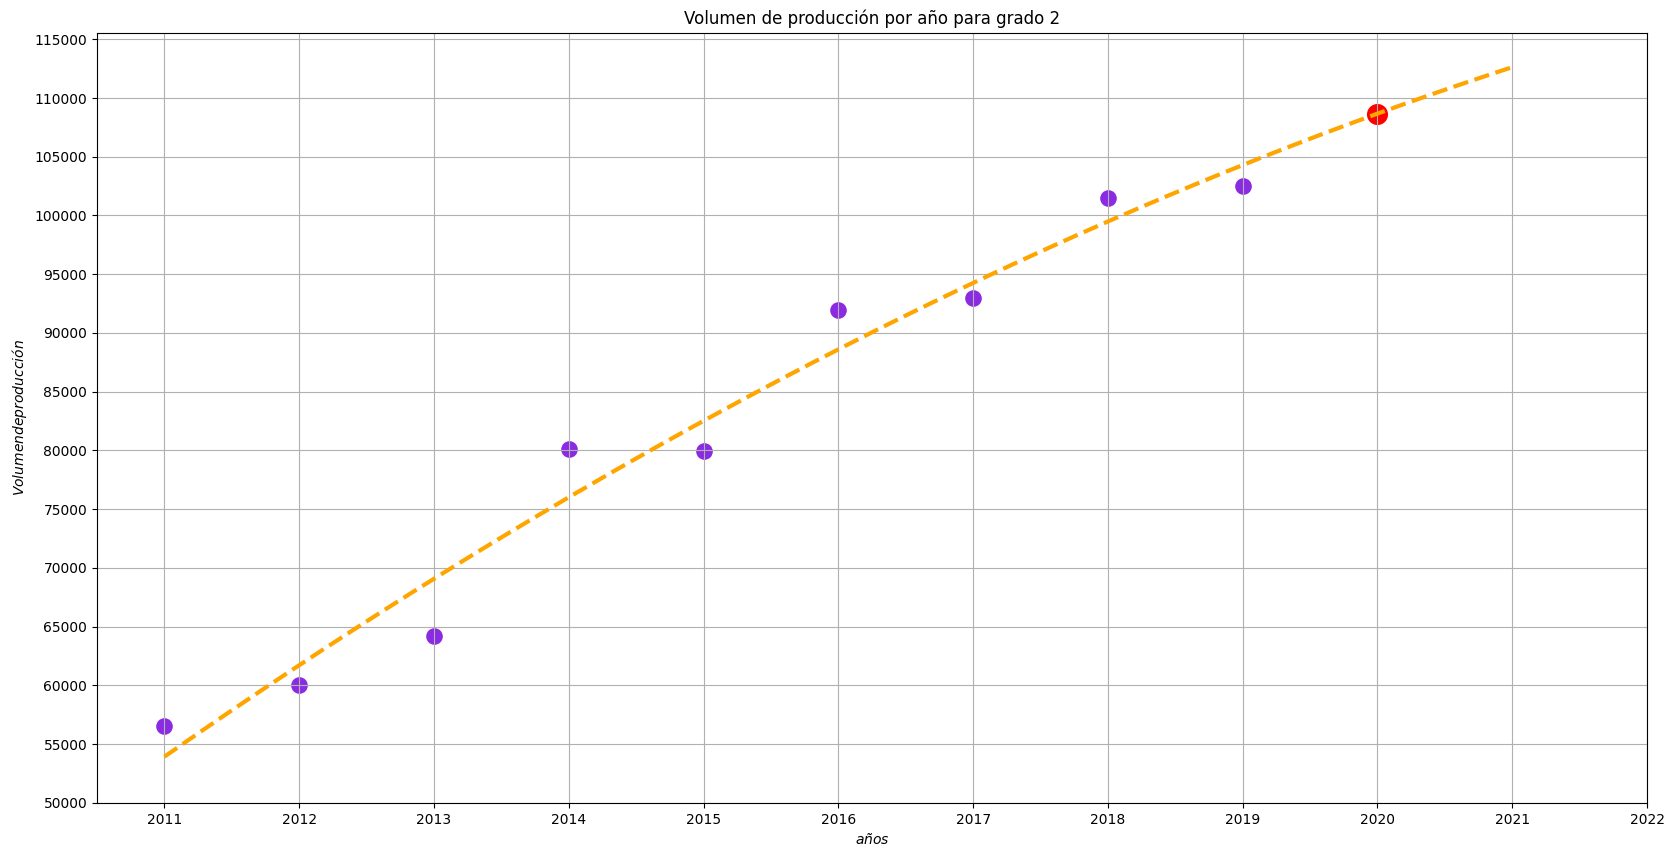

para grado 3 la predicción es: 101627.48828125


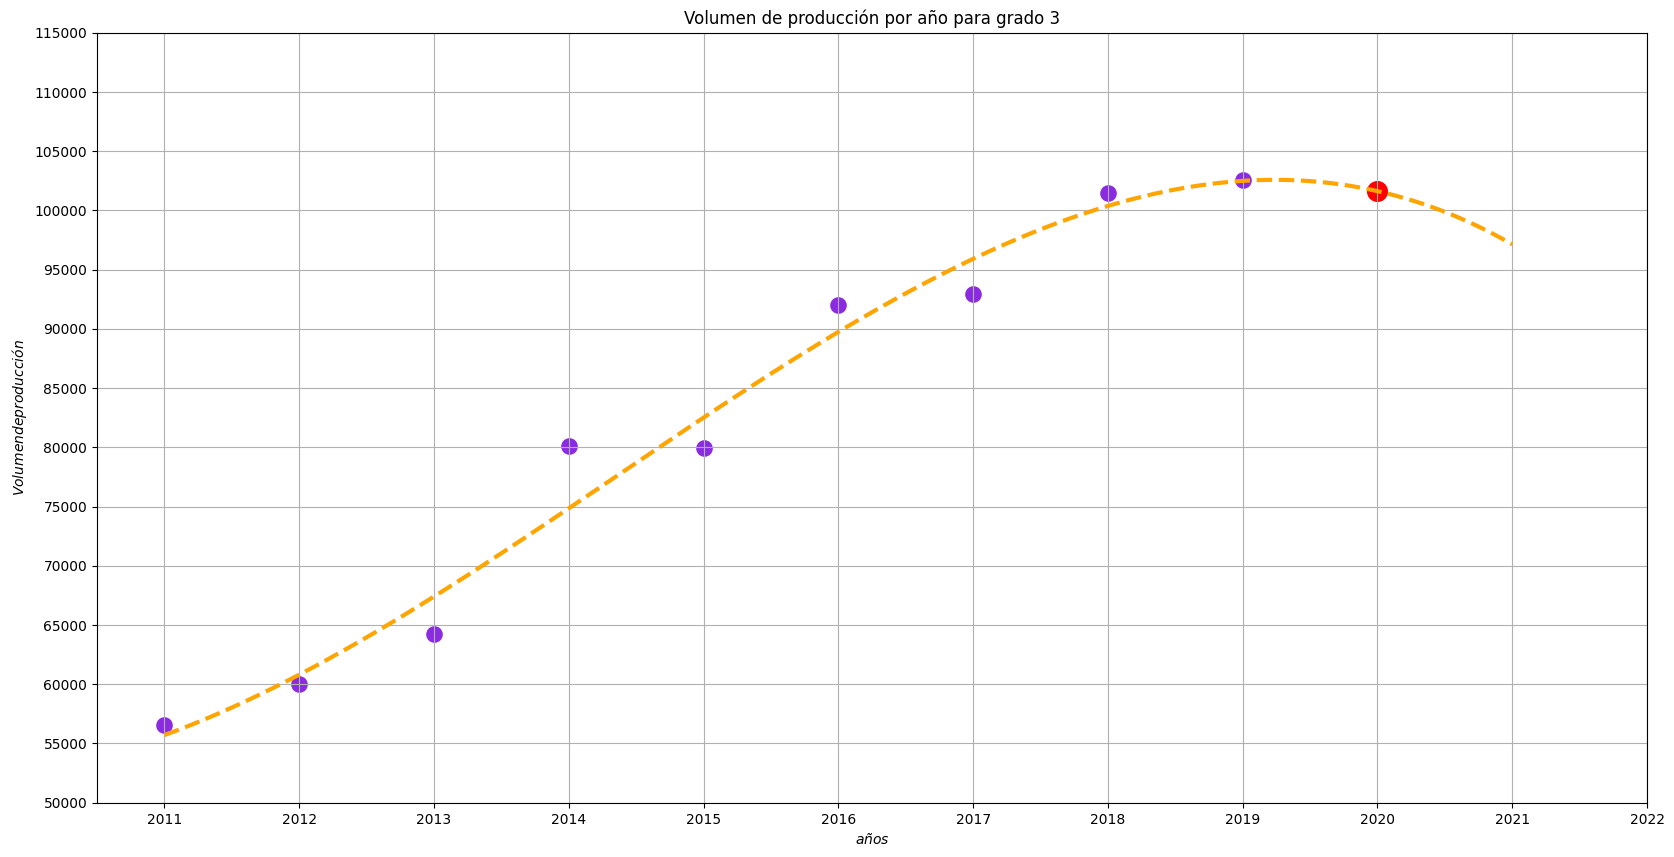

para grado 4 la predicción es: 108343.3125


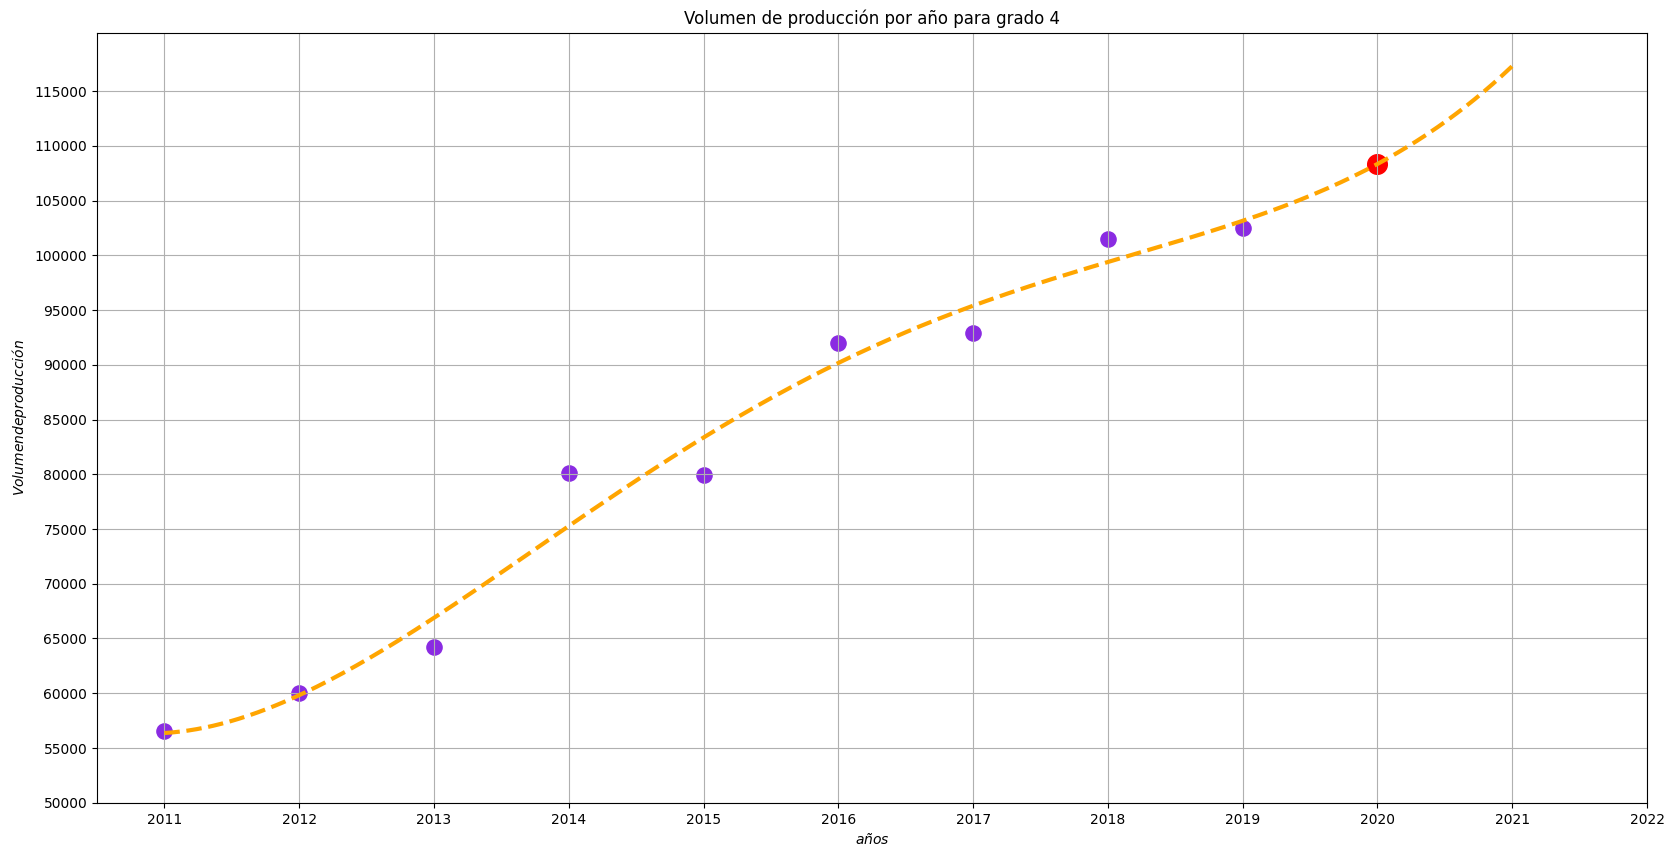

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 5 la predicción es: 108346.53125


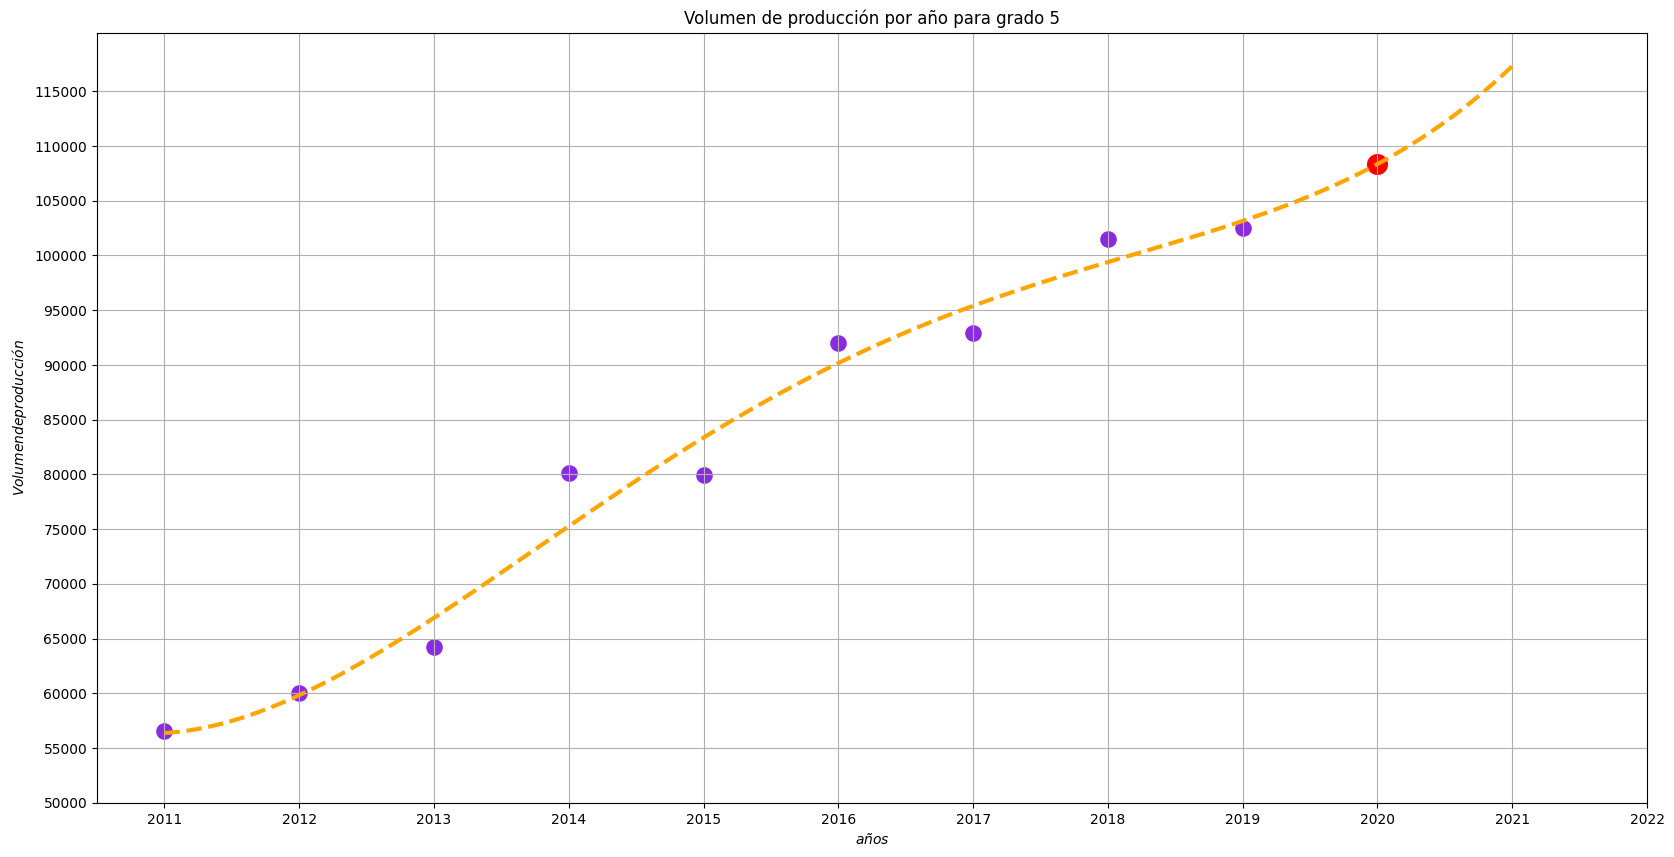

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 6 la predicción es: 108348.671875


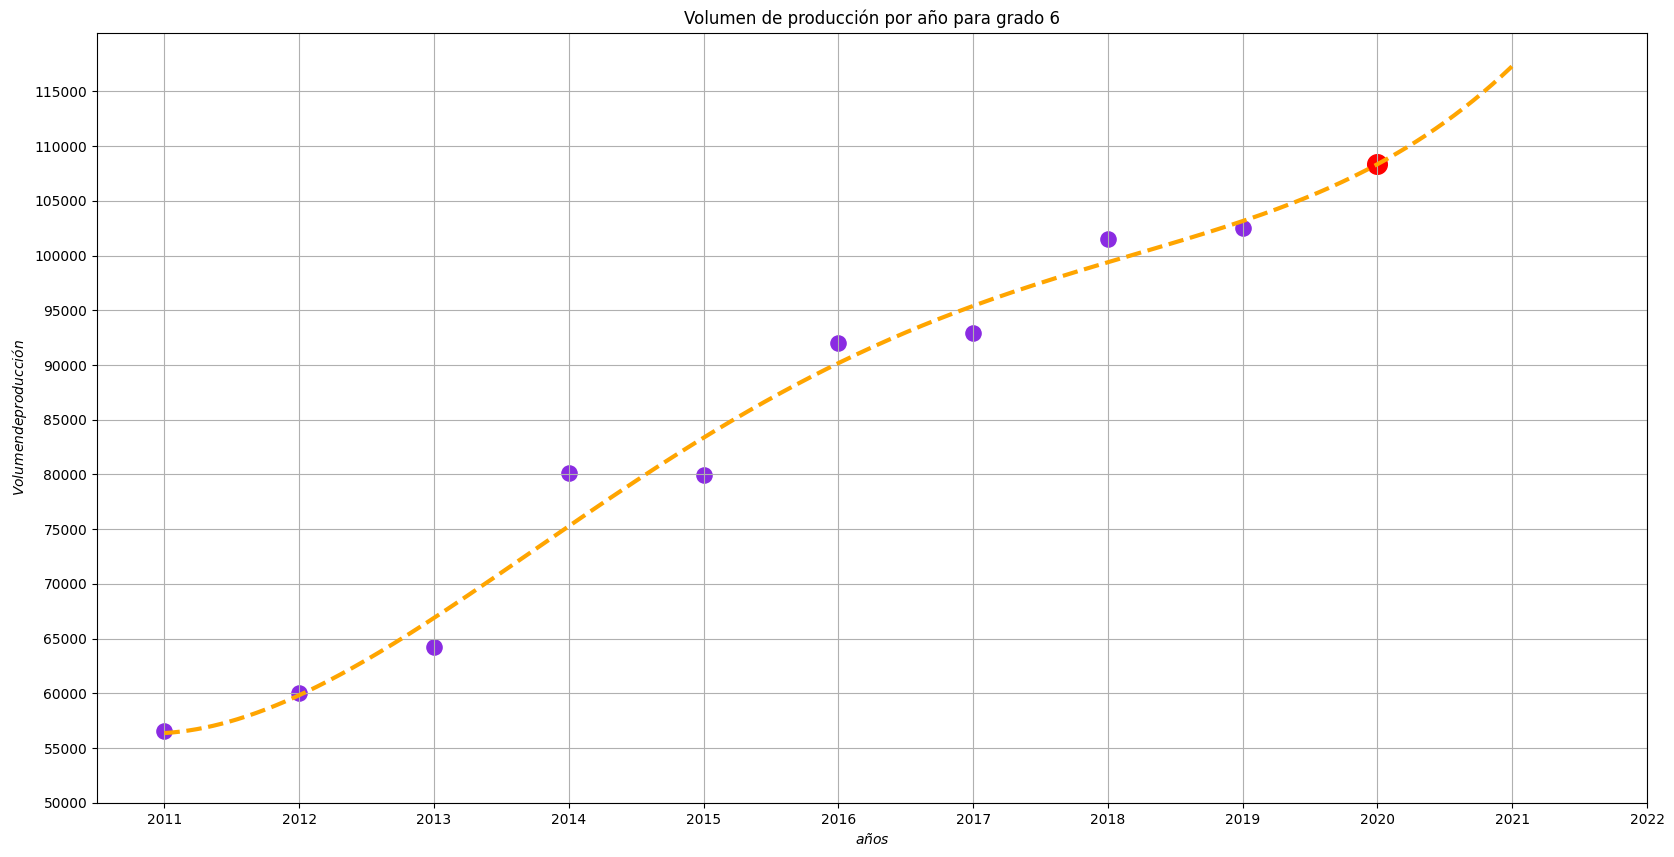

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 7 la predicción es: 108351.5625


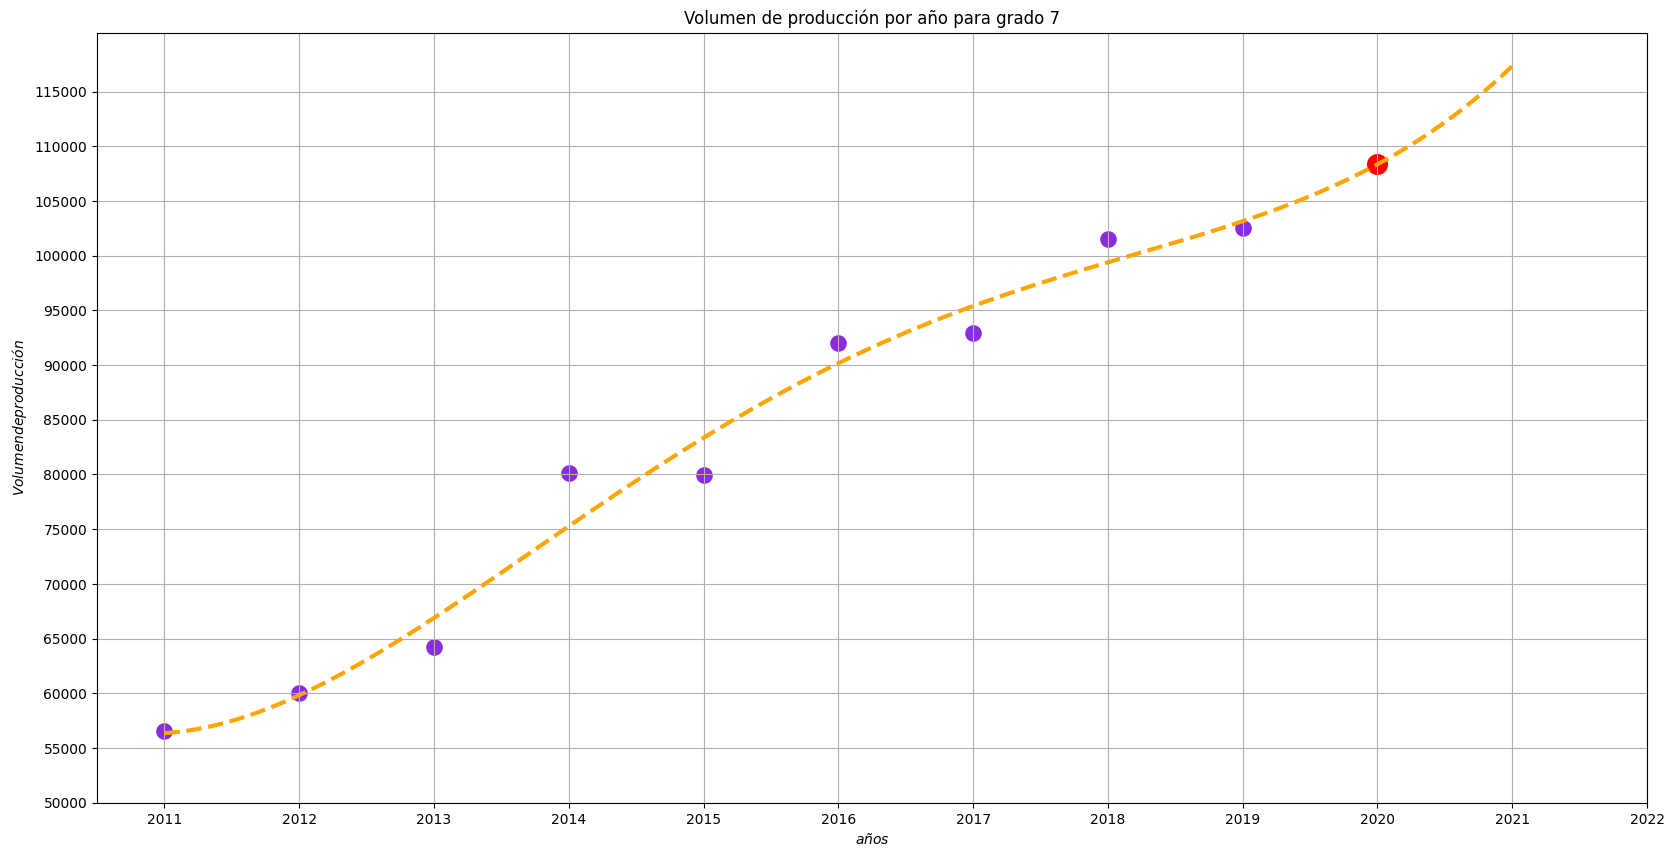

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 8 la predicción es: 108355.0546875


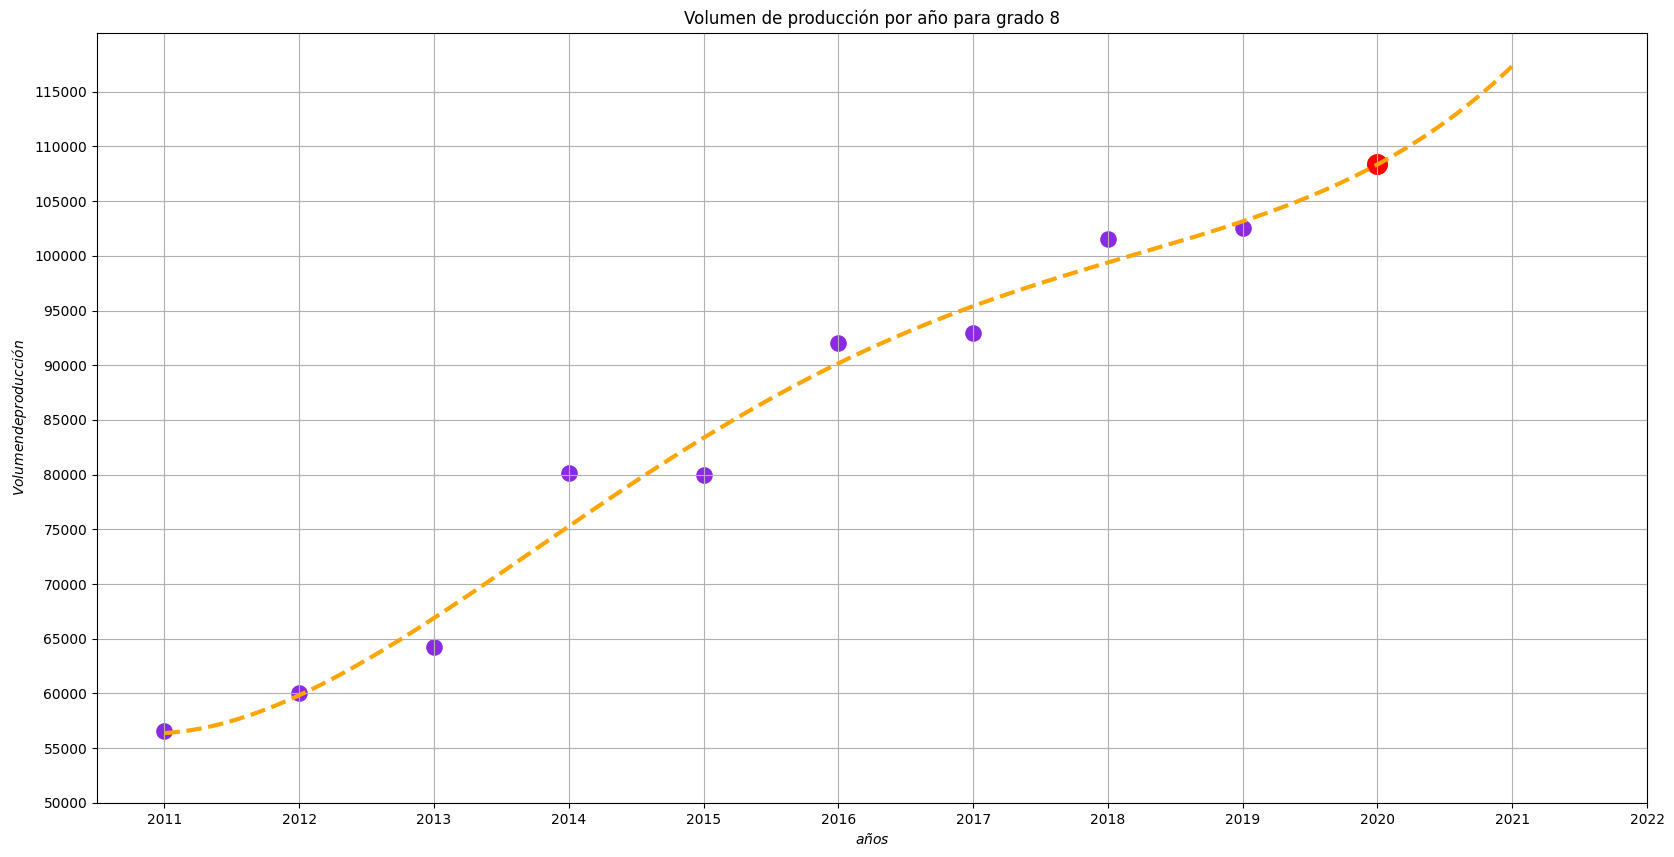

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 9 la predicción es: 108357.890625


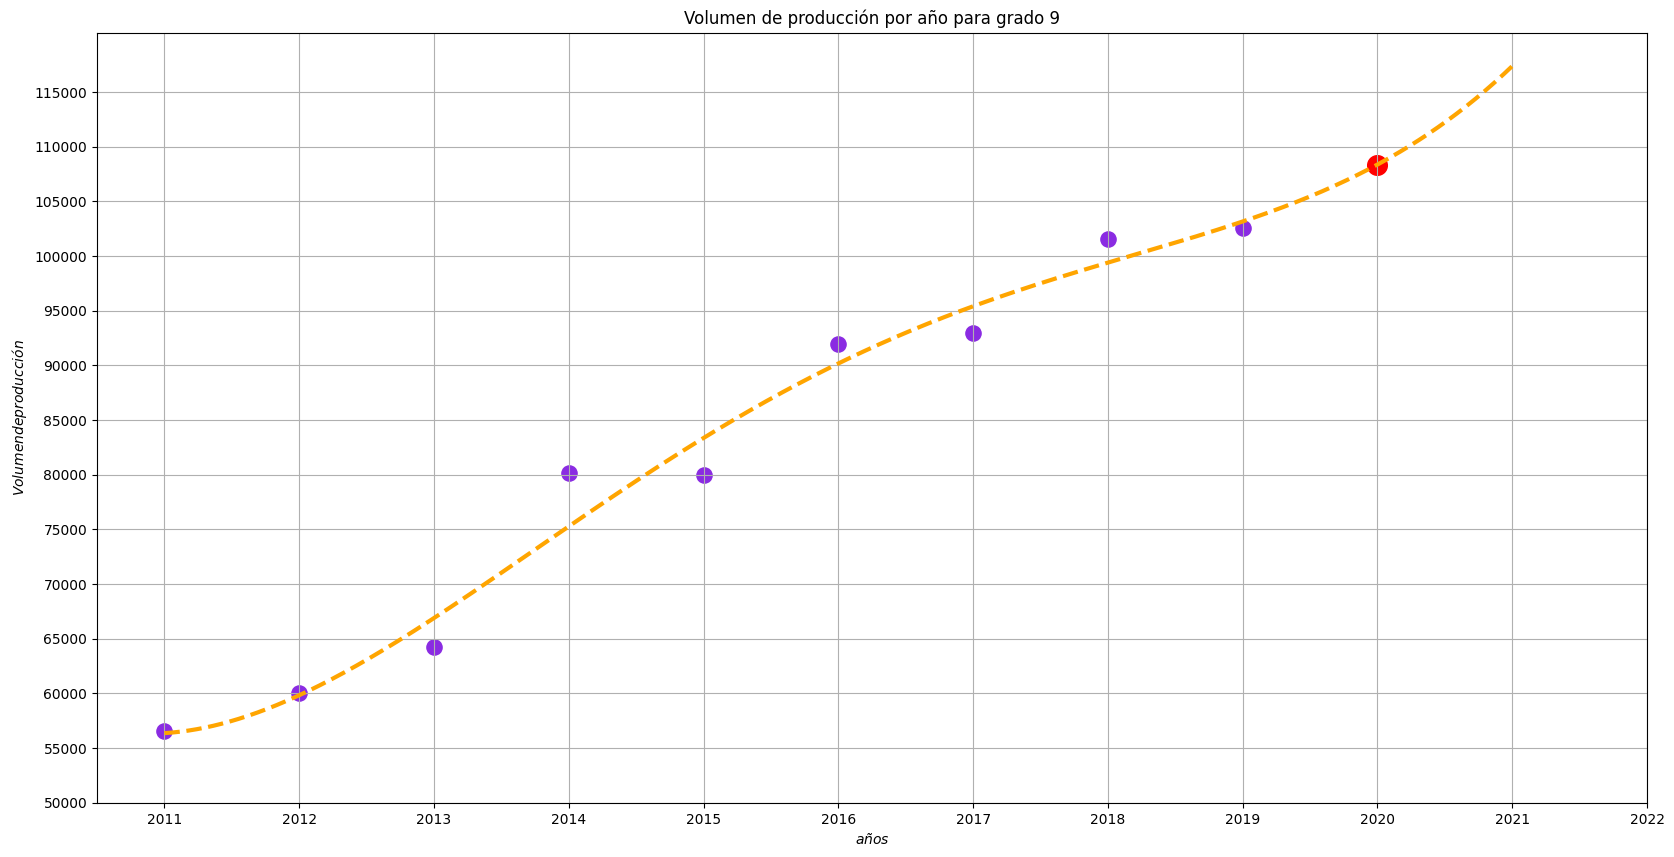

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 10 la predicción es: 108360.98046875


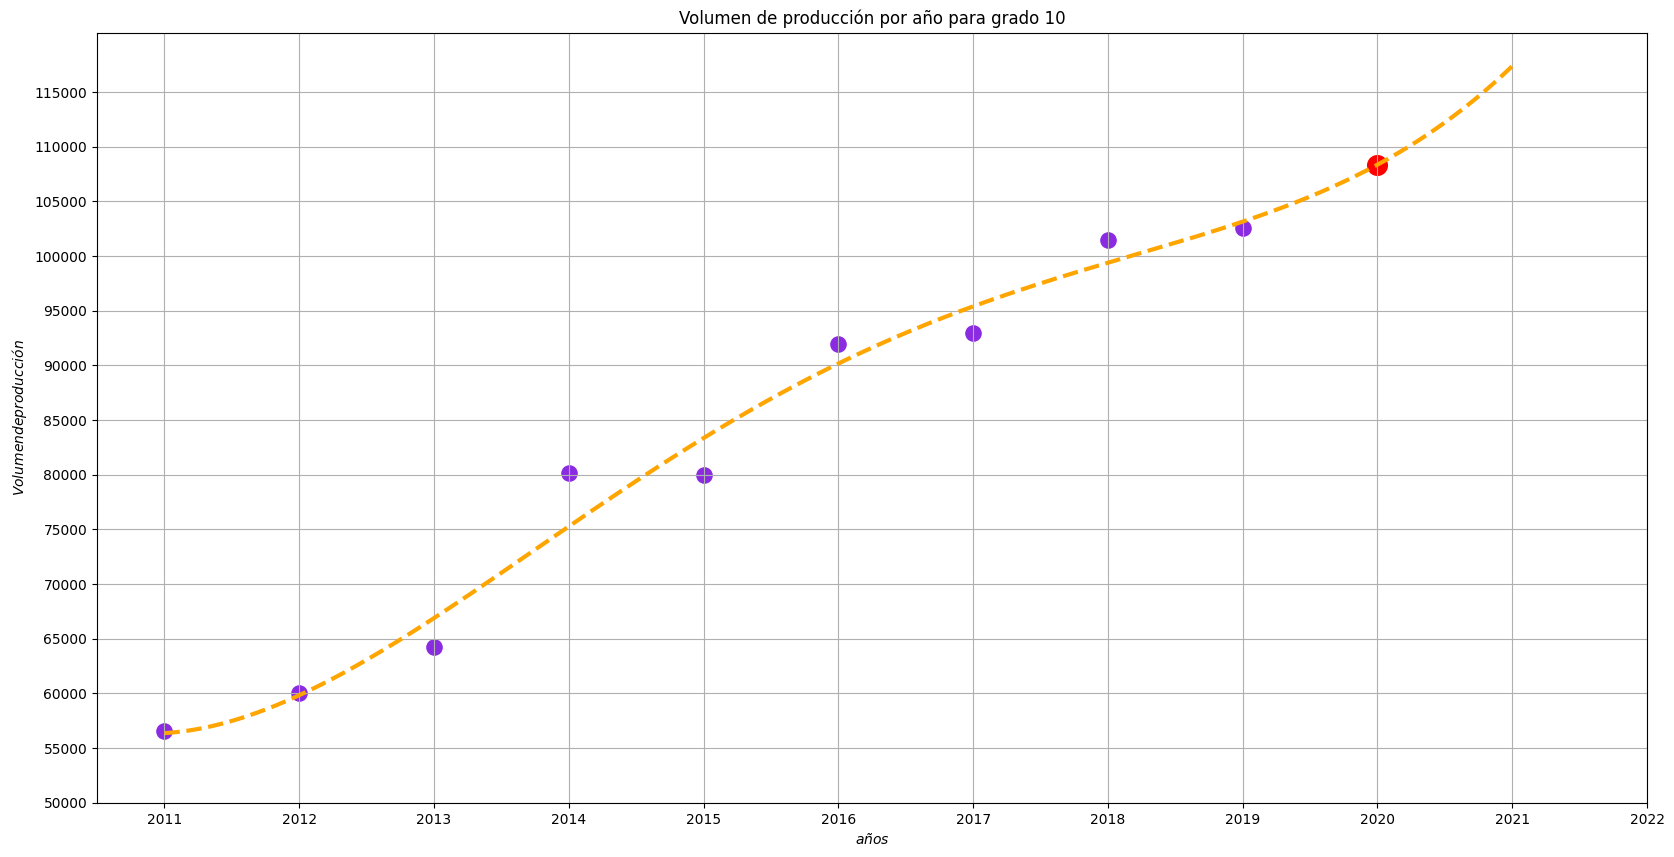

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 11 la predicción es: 92840.0


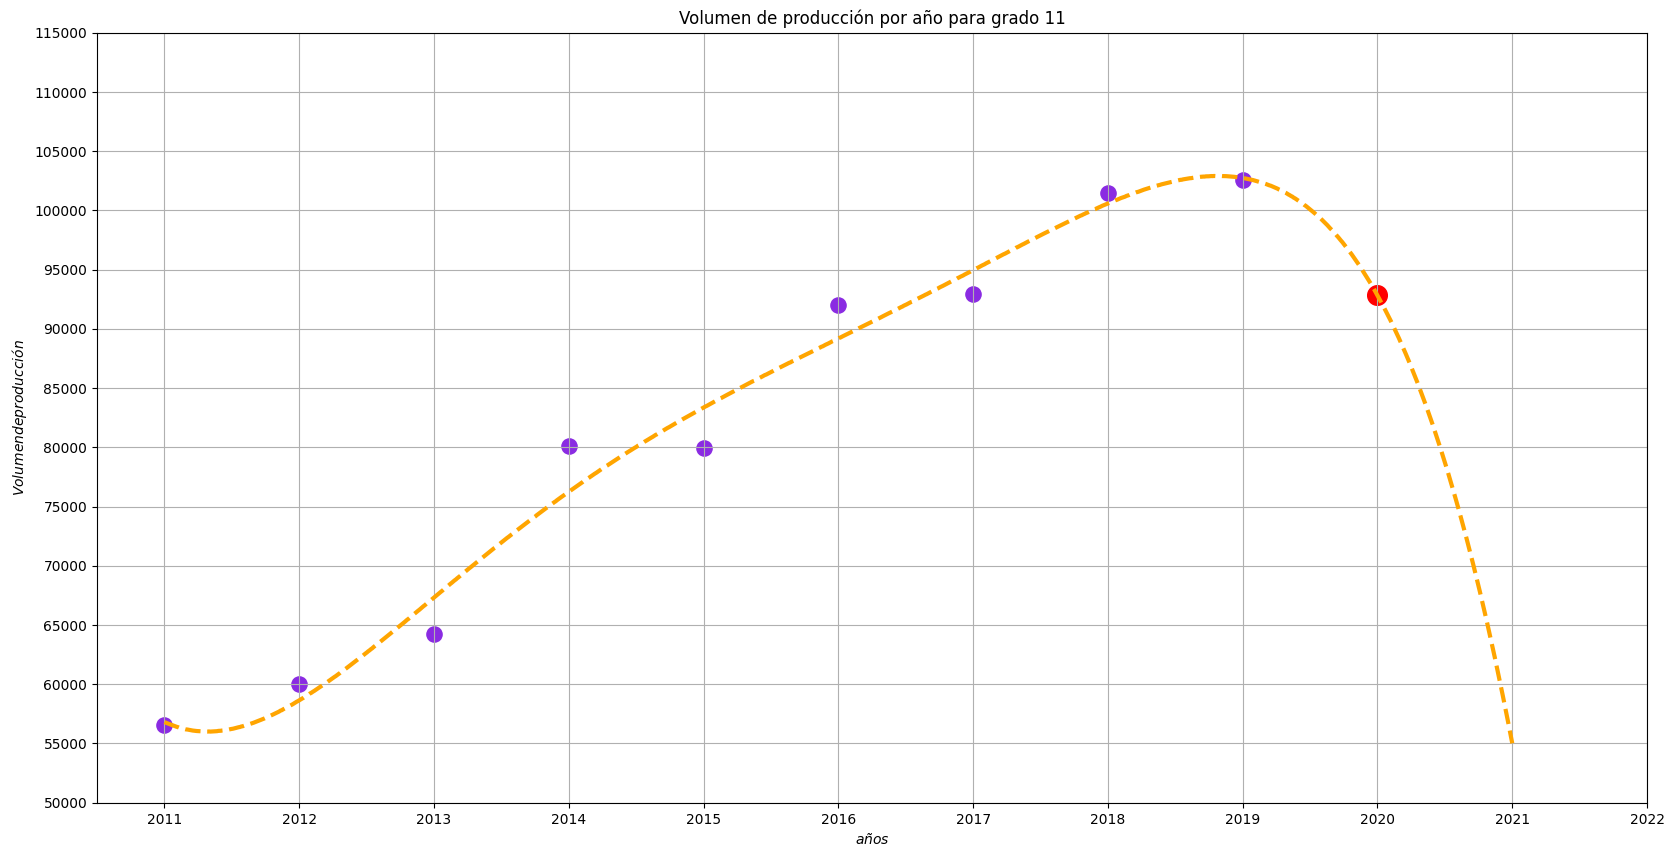

C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


para grado 12 la predicción es: 92576.0


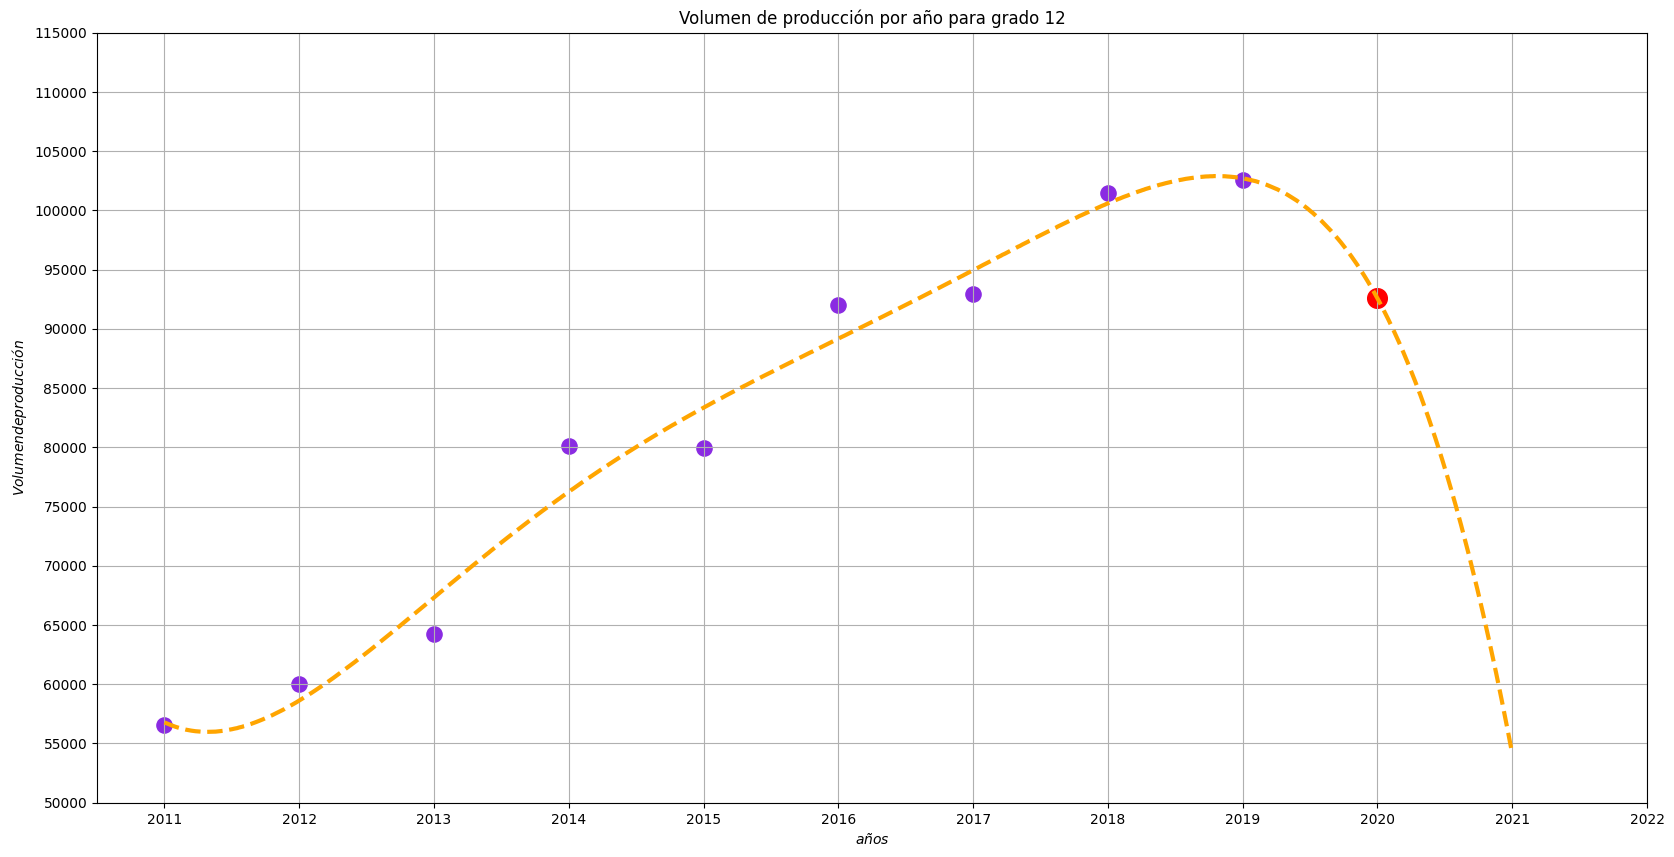

In [9]:
annio = 2020

for i in range(0,13):
    coef = np.polyfit( nuezTotal['Anio'], nuezTotal['Volumenproduccion'], i )
    predict = np.polyval(coef, anio)

    print(f"para grado {i} la predicción es: {predict}")
    x1 = np.linspace(2011, annio+1, 1000)
    y1 = fx(x1, coef)

    plt.figure(figsize=[20, 10])
    plt.title("Volumen de producción por año para grado " + str(i))

    plt.scatter(nuezTotal['Anio'], nuezTotal['Volumenproduccion'], s=120, c='blueviolet')
    plt.plot(x1, y1, "--", linewidth=3, color='Orange')
    plt.scatter(annio, predict, s=200, c='red')
    plt.yticks(range(50000, 120000, 5000))
    plt.xticks(range(2011, 2023, 1))
    plt.grid("on")
    ax = plt.gca()
    ax.set_xlabel("$años$")
    ax.set_ylabel("$Volumen de producción$")
    plt.show()

## Calculamos el error medio cuadrático

**Explicación:** Lo que se hizo en el paso anterior fue realizar aproximaciones de los puntos de años anteriores al 2020 mediante funciones polinomiales de grado *n* (que en este caso van de 0 a 12) para determinar su crecimiento y poder realizar un pronóstico.

El siguiente paso fue determinar cuál polinomio elegir, para ello se toma la diferencia de la función en cada año con respecto al valor real según los datos obtenidos, a este procedimiento se le llama ***Error medio cuadrático (MSE)***

Para grado 0 el MSE es: 274384719.1420445
Para grado 1 el MSE es: 10144186.971817592
Para grado 2 el MSE es: 8591196.850758106
Para grado 3 el MSE es: 6791369.65680144
Para grado 4 el MSE es: 6301015.341940282
Para grado 5 el MSE es: 6301275.932005386
Para grado 6 el MSE es: 6301787.34277904
Para grado 7 el MSE es: 6302353.093394276
Para grado 8 el MSE es: 6302848.736436538
Para grado 9 el MSE es: 6303346.08997054
Para grado 10 el MSE es: 6303858.5353307845
Para grado 11 el MSE es: 5681950.272044449
Para grado 12 el MSE es: 5684544.8942666715
Para grado 13 el MSE es: 5690935.045377783
Para grado 14 el MSE es: 5691758.8231555605
Para grado 15 el MSE es: 5692408.416488894
Para grado 16 el MSE es: 5690591.046488894
Para grado 17 el MSE es: 5690228.747600006
Para grado 18 el MSE es: 5689019.921211117
Para grado 19 el MSE es: 5689692.702600005
Para grado 20 el MSE es: 5688165.833294449


C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Jared Perales\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_

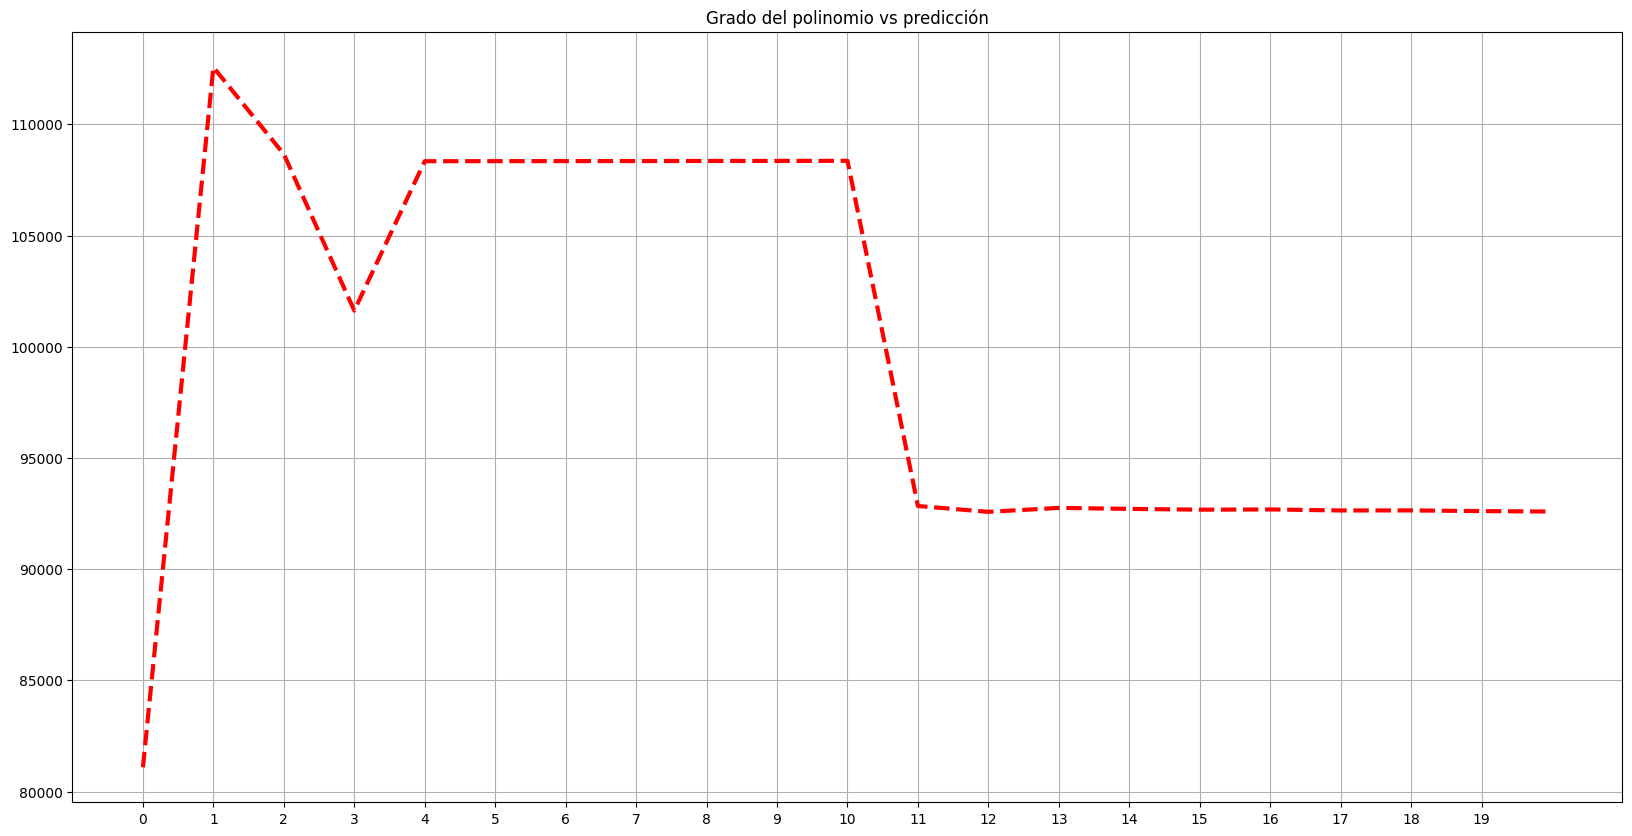

In [10]:
aproxi = np.array([])
grado = np.arange(0, 20 + 1, 1)
y_pred_vec = np.array([])

x = nuezTotal['Anio']
y = nuezTotal['Volumenproduccion']

for i in grado:
    # Repetimos el procedimiento de predicción con coeficiente
    coef = np.polyfit( x, y, i )
    predict = np.polyval(coef, anio)
    aproxi = np.append(aproxi, predict)

    # Para la MSE
    y_pred_vec = np.array([])
    for j in x:
        y_pred = np.polyval(coef, j)
        y_pred_vec = np.append(y_pred_vec, y_pred)
    
    MSE = (sum( (y - y_pred_vec)**2 ))/len(y)
    print(f"Para grado {i} el MSE es: {MSE}")

plt.figure(figsize=[20,10])
plt.title("Grado del polinomio vs predicción")
plt.xticks(range(0, 20, 1))
plt.plot(grado, aproxi, "--", linewidth=3, color='red')
plt.grid("on")
plt.show()


## Comprobamos resultados

Ahora que ya tenemos un mejor análisis sobre la producción de Nuez, su error medio cuadrático y la tendencia que puede seguir el crecimiento de producción, el siguiente paso fue comparar los resultados. 
En primera instancia se puede determinar que la mayor proximidad se encuentra en un polinomio de grado 4.  
Principalmente es debido a dos factores principales, y es que el MSE (error medio cuadrático) es el segundo menos de los mostrados anteriormente, pero destaca del primer lugar debido a que este último tiene un pronóstico significativamente menor del que se puede esperar con la tendencia incremental de los datos registrados, así que se realizó una comparación con los datos reales para comprobar la fiabilidad de nuestro algoritmo.

In [11]:
Result20 = pd.read_csv("src/Result2020/Cierre_agricola_mun_2020.csv", encoding='ISO-8859-1')

Result20 = Result20[ (Result20['Idestado'] == 8) & (Result20['Idcultivo'] == 7960000)]

Result20 = Result20.groupby(['Anio'])[['Volumenproduccion', 'Valorproduccion']].sum()

Result20.head()


,Volumenproduccion,Valorproduccion
Anio,,
2020,102061.0,7.329345e+09


## Comparación real de lo resultados

Una vez conseguidos los datos, podemos realizar una comparativa más exacta de la tendencia y los datos obtenidos. 
Para nuestra sorpresa, pese a que nuestro mejor candidato era el polinomio de grado 4, ya que contaba con un MSE menor (al ser de  6301015 y un volumen de producción de 108343) el resultado que nos mostraba un resultado más cercano al real fue el polinomio de grado 3, quien a pesar de tener un MSE más alejado, consiguió un valor significativamente más cercano al valor real para el año 2020 (siendo de 101627, con una diferencia en volumen de aproximadamente 400 del valor real).

Esto solo nos deja con unas serie de incógnitas que parecen demostrar la complejidad real sobre la predicción de datos mediante modelos matemáticos y estadísticos.


## Conclusiones

Después de realizar todo el análisis previo es posible rescatar una serie de conclusiones en base a los resultados obtenidos.  
El resultado principal es demostrar la complejidad de los datos, su tendencia de producción y el hecho de excluir una serie de factores que parecen afectar de manera significativa al volumen de nuez en cada año, siendo cuestiones como el clima, acceso al agua de riego, etc. 
Además, el modelo utilizado se vio severamente afectado por el calculo del MSE que, en este caso, al tratarse de cantidades significativamente altas, produjeron que sus valores se midiesen en millones. Además de que la cantidad limitada de datos y de iteraciones en el grado del polinomio provocaron que nuestra mejor apuesta fuese el uno en específico pero en realidad otro resultado era quien se acercó más al valor real de nuestro resultado esperado.


## Un ultimo intento

Pese a lo "caotico" de los resultados y nuestro resultados, aún es posible realizar una predicción para el año 2023 en base a la información que tenemos, en este caso con dos posibles resultados, uno con el polinomio de grado 3 y otro de grado 4, esto es meramente con fines de comparación entre ambos resultados, observar su comportamiento y curiosidad humana.  

Como nota personal, aún mantengo cierta firmeza en que la predicción con polinomio de grado 4 puede servir como referente para observar la tendencia de la producción de Nuez del presente año.

para grado 3 la predicción es: 76524.89599609375


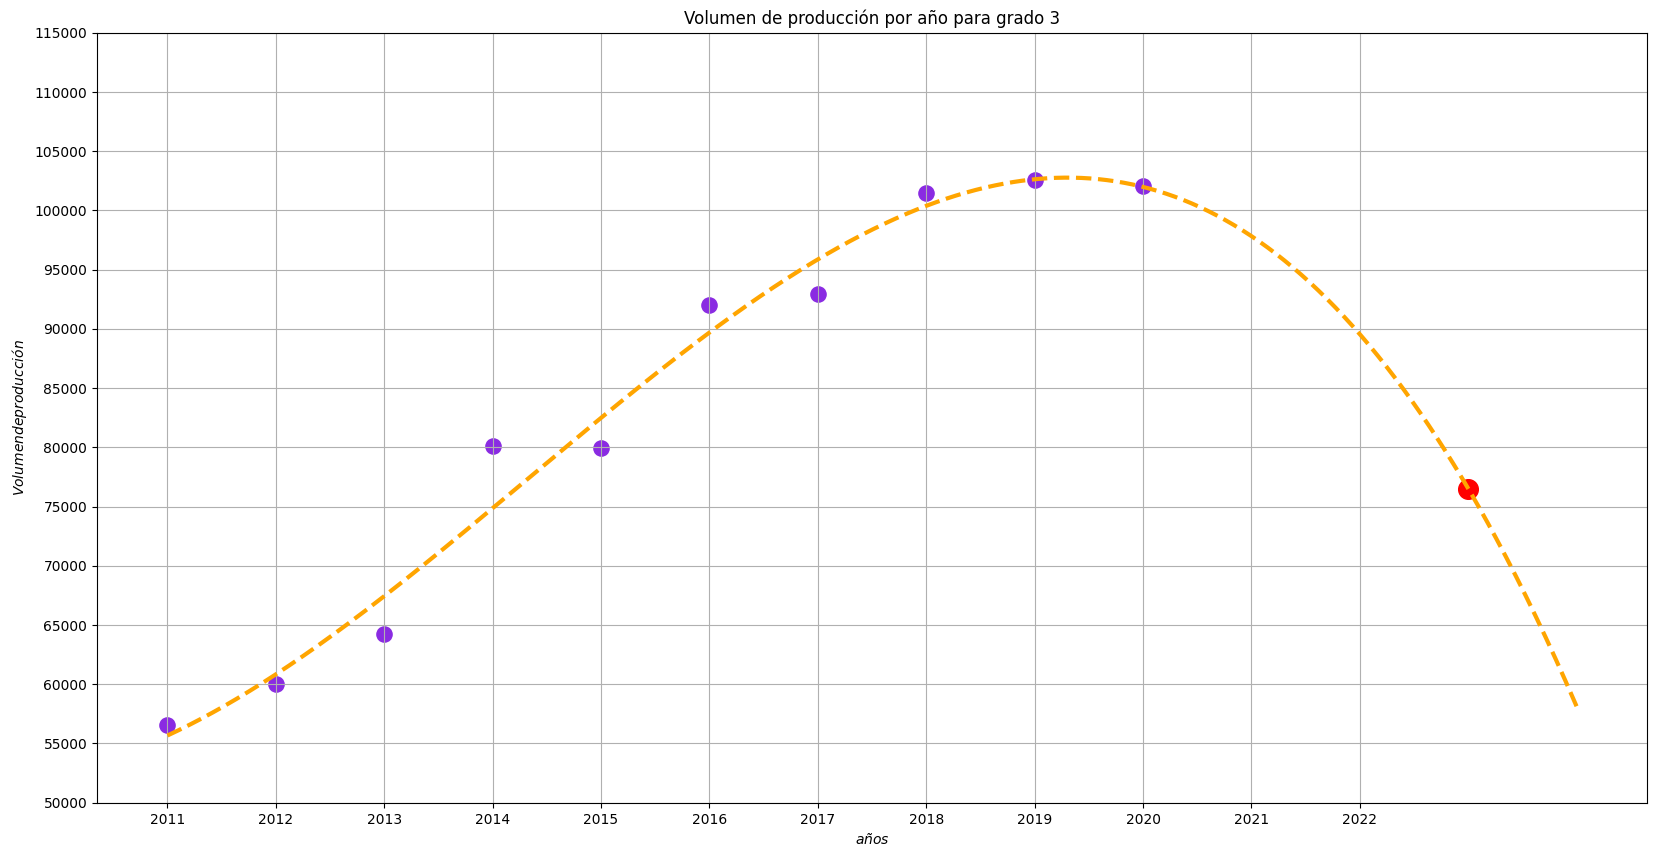

para grado 4 la predicción es: 99014.03125


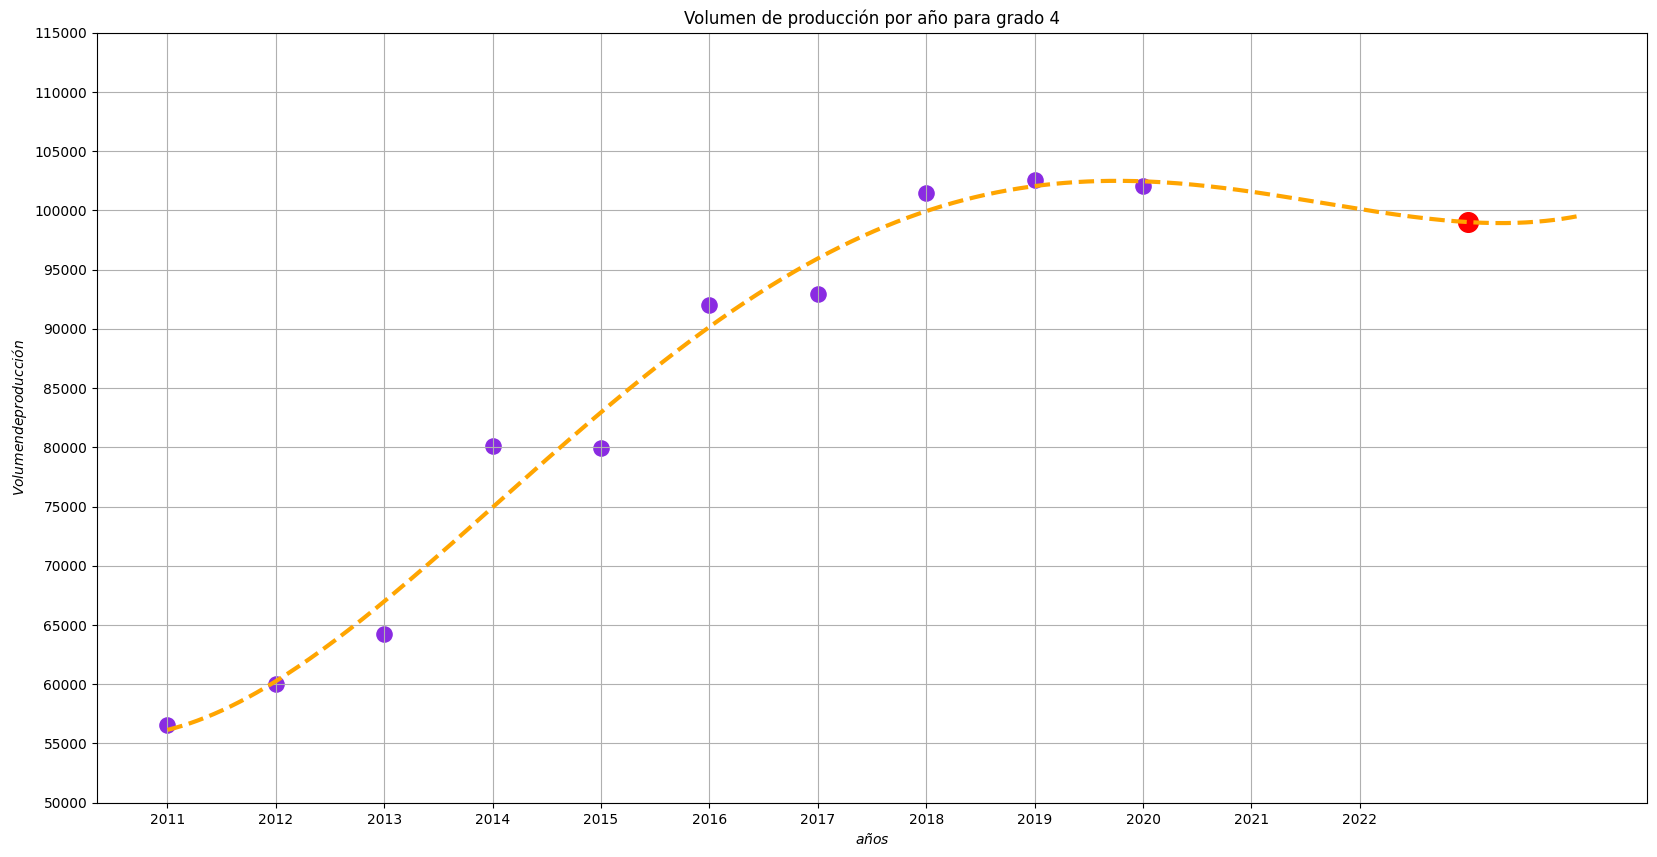

In [12]:
nuezTotal = pd.concat([nuezTotal, Result20.reset_index()])

nuezTotal.head()
annio = 2023

for i in range(3,5):
    coef = np.polyfit( nuezTotal['Anio'], nuezTotal['Volumenproduccion'], i )
    predict = np.polyval(coef, annio)

    print(f"para grado {i} la predicción es: {predict}")
    x1 = np.linspace(2011, annio+1, 1000)
    y1 = fx(x1, coef)

    plt.figure(figsize=[20, 10])
    plt.title("Volumen de producción por año para grado " + str(i))

    plt.scatter(nuezTotal['Anio'], nuezTotal['Volumenproduccion'], s=120, c='blueviolet')
    plt.plot(x1, y1, "--", linewidth=3, color='Orange')
    plt.scatter(annio, predict, s=200, c='red')
    plt.yticks(range(50000, 120000, 5000))
    plt.xticks(range(2011, 2023, 1))
    plt.grid("on")
    ax = plt.gca()
    ax.set_xlabel("$años$")
    ax.set_ylabel("$Volumen de producción$")
    plt.show()